# Image Question and Answering using Gemini Pro Vision Model

In [1]:
%cd ..

/Users/isham993/Desktop/Programming-Tutorials/decoding-data-science/getting-started-with-gemini-models-demo


/Users/isham993/mambaforge/envs/google_gemini_environment/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Importing Necessary Libraries

In [2]:
import os
import google.generativeai as genai

import requests
from PIL import Image
from io import BytesIO

import glob

In [3]:
GOOGLE_AI_STUDIO = os.getenv("GOOGLE_AI_STUDIO")
GEMINI_PRO_VISION = os.getenv("GEMINI_PRO_VISION")

### Configure Google AI API

In [4]:
genai.configure(api_key=GOOGLE_AI_STUDIO)

### Model Instantiation

In [5]:
vision_model = genai.GenerativeModel(GEMINI_PRO_VISION)

### Helper Functions

In [6]:
def load_image_from_url(url: str, new_size: tuple = None):
    """
    Loads an image from a given URL and optionally resizes it.

    :param url: The URL of the image to load.
    :type url: str
    :param new_size: The new size of the image, if resizing is desired. Defaults to None.
    :type new_size: tuple, optional
    :return: The loaded image, possibly resized.
    :rtype: PIL.Image.Image
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Raise an exception if the request was unsuccessful
    response.raise_for_status()

    # Open the image from the response content
    image = Image.open(BytesIO(response.content))

    # Resize the image only if a new size is provided
    if new_size is not None:
        image = image.resize(new_size)

    return image

In [8]:
def load_image_from_directory(file_path: str, new_size: tuple = None):
    # Open the image from the response content
    image = Image.open(file_path)

    # Resize the image only if a new size is provided
    if new_size is not None:
        image = image.resize(new_size)

    return image

### Basic Example

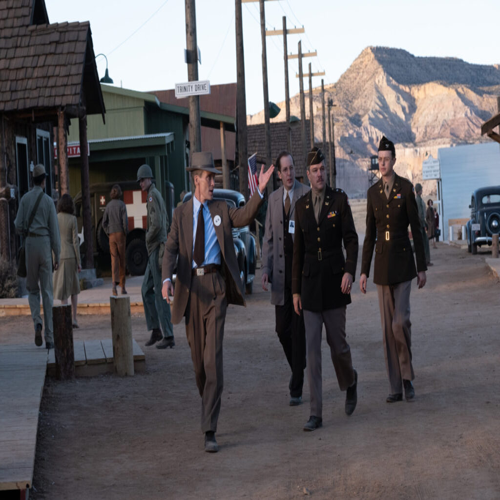

In [12]:
load_image_from_directory("./artifacts/sample_images/Oppenheimer_Scene.jpeg", (500, 500))

In [13]:
%%time
image = load_image_from_directory("./artifacts/sample_images/Oppenheimer_Scene.jpeg", (500, 500))
# Prepare the contents
prompt_1 = "What is shown in the picture?"
prompt_2 = "What these people are doing?"
contents = [prompt_1, prompt_2, image]

responses = vision_model.generate_content(contents, stream=True)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")


-------Response--------
 The picture shows a scene from the movie Oppenheimer. The four men in the foreground are walking down a street in a military camp. They are dressed in military uniforms and one of them is wearing a suit. The background of the picture is a desert landscape with mountains in the distance.CPU times: user 124 ms, sys: 30.2 ms, total: 154 ms
Wall time: 9.54 s


For our special use case demo, we will be asking Gemini Pro Vision Model for anime recommendation.

### Use Case: Movie Recommendation

In [10]:
movie_posters = [load_image_from_directory(poster_path, (500, 500)) for poster_path in glob.glob("./artifacts/sample_images/*_Poster.*")]

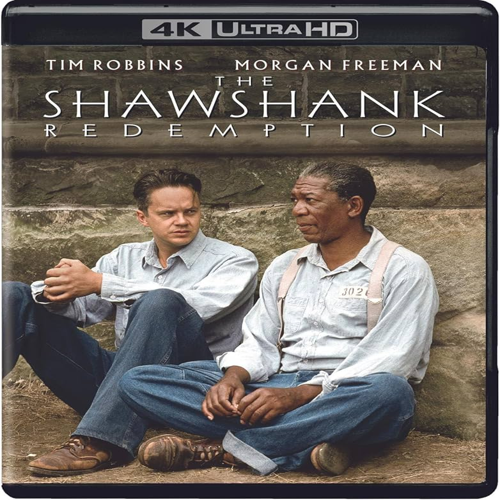

In [11]:
movie_posters[3]

In [12]:
# Prepare the contents
prompt_1 = "Name the image posters of these movies and their release years."
prompt_2 = "What these movies have in common?"
prompt_3 = "What makes these movies different from each other?"
prompt_4 = "Recommend one movie from this list that offers valuable life lessons, insights on survival in the world and also is more relevant to the real world?"
contents = [prompt_1, prompt_2, prompt_3, prompt_4] + movie_posters

responses = vision_model.generate_content(contents, stream=True)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")


-------Response--------
 The image posters of these movies are:
1. Oppenheimer (2023)
2. Toy Story (1995)
3. Barbie (2023)
4. The Shawshank Redemption (1994)
5. Guardians of the Galaxy Vol. 3 (2023)

These movies all have different themes and genres. Oppenheimer is a historical drama, Toy Story is an animated comedy, Barbie is a live-action comedy, The Shawshank Redemption is a drama, and Guardians of the Galaxy Vol. 3 is a science fiction action-adventure.

However, they all share one thing in common: they are all well-made films that have been praised by critics and audiences alike. They are also all commercially successful, having grossed millions of dollars at the box office.

In terms of which movie offers valuable life lessons, insights on survival in the world, and is more relevant to the real world, I would recommend The Shawshank Redemption. This movie tells the story of Andy Dufresne, a banker who is wrongly convicted of murdering his wife and sent to prison. Despite the har

### Ideas for other uses cases
- Understand and demystify technical drawings for academics and/or engineering works. 
- Other Types of Recommendation e.g. Products, Movies, Meals, Retail, Gadgets etc
- Image Analysis: Identifying similarities and differences between pictures.
- Location Identification: Utilizing photographs to determine and suggest geographical locations.

The potential use cases for this model are limitless!